In [1]:
#the enivironment i am using grad

In [14]:
import os
import scipy.io

# Define the parent directory for the dataset
# parent_dir = r"C:\Users\dell\Desktop\gradproject\AI04-Grad\datasets\CREMA-D\seed-IV\eeg_raw_data"
parent_dir="C:\graduation project folder\datasets\seed_iv\eeg_raw_data"
# Specify the session to process (e.g., session 1)
session = 1

# Construct the path to the session directory
session_path = os.path.join(parent_dir, str(session))

# Check if the session directory exists
if os.path.exists(session_path):
    # List all observations (files) in the session directory
    persons_list = os.listdir(session_path)
    print(f"Observations for session {session}: {persons_list}")
    
    # Process each .mat file in the session directory
    for person_file in persons_list:
        if person_file.endswith('.mat'):  # Check for .mat files
            file_path = os.path.join(session_path, person_file)
            print(f"Processing file: {file_path}")
            
            # Load the .mat file
            data = scipy.io.loadmat(file_path)
            
            # Print the keys in the .mat file to understand its structure
            print(f"Keys in {person_file}: {list(data.keys())}")
else:
    print(f"Session directory does not exist: {session_path}")


Observations for session 1: ['10_20151014.mat', '11_20150916.mat', '12_20150725.mat', '13_20151115.mat', '14_20151205.mat', '15_20150508.mat', '1_20160518.mat', '2_20150915.mat', '3_20150919.mat', '4_20151111.mat', '5_20160406.mat', '6_20150507.mat', '7_20150715.mat', '8_20151103.mat', '9_20151028.mat']
Processing file: C:\graduation project folder\datasets\seed_iv\eeg_raw_data\1\10_20151014.mat
Keys in 10_20151014.mat: ['__header__', '__version__', '__globals__', 'tyc_eeg1', 'tyc_eeg2', 'tyc_eeg3', 'tyc_eeg4', 'tyc_eeg5', 'tyc_eeg6', 'tyc_eeg7', 'tyc_eeg8', 'tyc_eeg9', 'tyc_eeg10', 'tyc_eeg11', 'tyc_eeg12', 'tyc_eeg13', 'tyc_eeg14', 'tyc_eeg15', 'tyc_eeg16', 'tyc_eeg17', 'tyc_eeg18', 'tyc_eeg19', 'tyc_eeg20', 'tyc_eeg21', 'tyc_eeg22', 'tyc_eeg23', 'tyc_eeg24']
Processing file: C:\graduation project folder\datasets\seed_iv\eeg_raw_data\1\11_20150916.mat
Keys in 11_20150916.mat: ['__header__', '__version__', '__globals__', 'whh_eeg1', 'whh_eeg2', 'whh_eeg3', 'whh_eeg4', 'whh_eeg5', 'whh

In [15]:
import os
import scipy.io


parent_dir="C:\graduation project folder\datasets\seed_iv\eeg_raw_data"
# Specify the session to process (e.g., session 1)
session = 2

# Construct the path to the session directory
session_path = os.path.join(parent_dir, str(session))

# Check if the session directory exists
if os.path.exists(session_path):
    # List all observations (files) in the session directory
    persons_list = os.listdir(session_path)
    print(f"Observations for session {session}: {persons_list}")
    
    # Process each .mat file in the session directory
    for person_file in persons_list:
        if person_file.endswith('.mat'):  # Check for .mat files
            file_path = os.path.join(session_path, person_file)
            print(f"Processing file: {file_path}")
            
            try:
            # Attempt to load the .mat file
                 data = scipy.io.loadmat(file_path)
                 print(f"Keys in {person_file}: {list(data.keys())}")
            except Exception as e:
                 print(f"Error processing file {file_path}: {e}")
else:
    print(f"Session directory does not exist: {session_path}")

Observations for session 2: ['10_20151021.mat', '11_20150921.mat', '12_20150804.mat', '13_20151125.mat', '14_20151208.mat', '15_20150514.mat', '1_20161125.mat', '2_20150920.mat', '3_20151018.mat', '4_20151118.mat', '5_20160413.mat', '6_20150511.mat', '7_20150717.mat', '8_20151110.mat', '9_20151119.mat']
Processing file: C:\graduation project folder\datasets\seed_iv\eeg_raw_data\2\10_20151021.mat
Keys in 10_20151021.mat: ['__header__', '__version__', '__globals__', 'tyc_eeg1', 'tyc_eeg2', 'tyc_eeg3', 'tyc_eeg4', 'tyc_eeg5', 'tyc_eeg6', 'tyc_eeg7', 'tyc_eeg8', 'tyc_eeg9', 'tyc_eeg10', 'tyc_eeg11', 'tyc_eeg12', 'tyc_eeg13', 'tyc_eeg14', 'tyc_eeg15', 'tyc_eeg16', 'tyc_eeg17', 'tyc_eeg18', 'tyc_eeg19', 'tyc_eeg20', 'tyc_eeg21', 'tyc_eeg22', 'tyc_eeg23', 'tyc_eeg24']
Processing file: C:\graduation project folder\datasets\seed_iv\eeg_raw_data\2\11_20150921.mat
Keys in 11_20150921.mat: ['__header__', '__version__', '__globals__', 'whh_eeg1', 'whh_eeg2', 'whh_eeg3', 'whh_eeg4', 'whh_eeg5', 'whh

In [16]:
import os
import scipy.io


parent_dir="C:\graduation project folder\datasets\seed_iv\eeg_raw_data"
# Specify the session to process (e.g., session 1)
session = 3

# Construct the path to the session directory
session_path = os.path.join(parent_dir, str(session))

# Check if the session directory exists
if os.path.exists(session_path):
    # List all observations (files) in the session directory
    persons_list = os.listdir(session_path)
    print(f"Observations for session {session}: {persons_list}")
    
    # Process each .mat file in the session directory
    for person_file in persons_list:
        if person_file.endswith('.mat'):  # Check for .mat files
            file_path = os.path.join(session_path, person_file)
            print(f"Processing file: {file_path}")
            
            try:
            # Attempt to load the .mat file
                data = scipy.io.loadmat(file_path)
                print(f"Keys in {person_file}: {list(data.keys())}")
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")
else:
    print(f"Session directory does not exist: {session_path}")

Observations for session 3: ['10_20151023.mat', '11_20151011.mat', '12_20150807.mat', '13_20161130.mat', '14_20151215.mat', '15_20150527.mat', '1_20161126.mat', '2_20151012.mat', '3_20151101.mat', '4_20151123.mat', '5_20160420.mat', '6_20150512.mat', '7_20150721.mat', '8_20151117.mat', '9_20151209.mat']
Processing file: C:\graduation project folder\datasets\seed_iv\eeg_raw_data\3\10_20151023.mat
Keys in 10_20151023.mat: ['__header__', '__version__', '__globals__', 'tyc_eeg1', 'tyc_eeg2', 'tyc_eeg3', 'tyc_eeg4', 'tyc_eeg5', 'tyc_eeg6', 'tyc_eeg7', 'tyc_eeg8', 'tyc_eeg9', 'tyc_eeg10', 'tyc_eeg11', 'tyc_eeg12', 'tyc_eeg13', 'tyc_eeg14', 'tyc_eeg15', 'tyc_eeg16', 'tyc_eeg17', 'tyc_eeg18', 'tyc_eeg19', 'tyc_eeg20', 'tyc_eeg21', 'tyc_eeg22', 'tyc_eeg23', 'tyc_eeg24']
Processing file: C:\graduation project folder\datasets\seed_iv\eeg_raw_data\3\11_20151011.mat
Keys in 11_20151011.mat: ['__header__', '__version__', '__globals__', 'whh_eeg1', 'whh_eeg2', 'whh_eeg3', 'whh_eeg4', 'whh_eeg5', 'whh

In [17]:
import os
import shutil

# Base directory for EEG raw data
base_dir = r"C:\graduation project folder\datasets\seed_iv\eeg_raw_data"
target_base_dir = r"C:\graduation project folder\datasets\Final_SeedIV"

# Session mapping
session_mapping = {
    1: "session1",
    2: "session2",
    3: "session3"
}

# Move files to session folders
for session, folder_name in session_mapping.items():
    session_dir = os.path.join(target_base_dir, folder_name)
    os.makedirs(session_dir, exist_ok=True)  # Create folder if not exists

    session_source_dir = os.path.join(base_dir, str(session))
    if os.path.exists(session_source_dir):
        for file_name in os.listdir(session_source_dir):
            if file_name.endswith(".mat"):
                source_file = os.path.join(session_source_dir, file_name)
                target_file = os.path.join(session_dir, file_name)
                shutil.move(source_file, target_file)

print("Files organized into session folders.")


Files organized into session folders.


In [ ]:
import os
import scipy.io
import numpy as np

# Base directory for organized sessions
base_dir = r"C:\graduation project folder\datasets\Final_SeedIV"
sessions = ["session1", "session2", "session3"]

# Initialize lists for data
eeg_shapes = []
eeg_ranges = []

# Process each session
for session in sessions:
    session_dir = os.path.join(base_dir, session)
    if not os.path.exists(session_dir):
        print(f"Session directory not found: {session_dir}")
        continue

    for mat_file in os.listdir(session_dir):
        if mat_file.endswith(".mat"):
            file_path = os.path.join(session_dir, mat_file)
            try:
            # Attempt to load the .mat file
                data = scipy.io.loadmat(file_path)
                
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

            # Extract EEG data from keys
            eeg_data = []
            for key in data.keys():
                if key.endswith("_eeg1") or key.endswith("_eeg24"):  # Adjust this logic based on keys
                    eeg_data.append(data[key].flatten())

            # Align and preprocess data
            if len(eeg_data) > 0:
                max_length = max(len(ch) for ch in eeg_data)
                eeg_data_aligned = [
                    np.pad(ch, (0, max_length - len(ch)), 'constant') if len(ch) < max_length else ch[:max_length]
                    for ch in eeg_data
                ]

                eeg_data_aligned = np.stack(eeg_data_aligned, axis=0)
                eeg_shapes.append(eeg_data_aligned.shape)
                eeg_ranges.append((np.min(eeg_data_aligned), np.max(eeg_data_aligned)))

# Output shapes and ranges for debugging
print("EEG Data Shapes:", eeg_shapes)
print("EEG Data Ranges:", eeg_ranges)


In [ ]:
import matplotlib.pyplot as plt

# Example plot for EEG data from a single session
eeg_sample = eeg_data_aligned[0]  # Take the first channel from aligned data
plt.figure(figsize=(10, 5))
plt.plot(eeg_sample)
plt.title("EEG Signal from Channel 1")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [20]:
import numpy
import sklearn

print(f"NumPy version: {numpy.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")


NumPy version: 1.24.4
Scikit-learn version: 1.0.2


In [21]:
from sklearn.metrics import mutual_info_score
import numpy as np

def mi_matrix(X, N):
    """
    Compute the mutual information matrix for EEG signals.
    
    Parameters:
    X (array-like): EEG data with shape (channels, samples).
    N (int): Number of EEG channels.

    Returns:
    np.ndarray: Mutual information matrix of shape (N, N).
    """
    mat = np.zeros((N, N), dtype=float)
    for i in range(N):
        for j in range(i, N):  # Mutual information matrix is symmetric
            mat[i][j] = mutual_info_score(X[i].ravel(), X[j].ravel())
            mat[j][i] = mat[i][j]
    return mat


In [23]:
def wasserstein_scalar_curvature(mi_matrix):
    """
    Calculate the Wasserstein scalar curvature for the MI matrix.

    Parameters:
    mi_matrix (np.ndarray): Mutual information matrix.

    Returns:
    float: Wasserstein scalar curvature.
    """
    lambdas = np.linalg.eigvals(mi_matrix)
    if np.any(lambdas <= 0):
        return 0  # Avoid issues with negative eigenvalues

    n = len(lambdas)
    curvature = sum([1 / (lambdas[i] + lambdas[j]) for i in range(n) for j in range(n)])
    return curvature


In [24]:
def extract_label_from_filename(filename):
    """
    Extracts the label from the filename based on a predefined mapping.

    Parameters:
    filename (str): Name of the .mat file.

    Returns:
    int: Corresponding label ID.
    """
    label_mapping = {
        "happy": 0,
        "sad": 1,
        "fear": 2,
        "neutral": 3
    }
    for label, label_id in label_mapping.items():
        if label in filename.lower():
            return label_id
    raise ValueError(f"Label not found in filename: {filename}")


In [ ]:
def normalize_eeg(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


In [42]:
file_path = r"C:\graduation project folder\datasets\Final_SeedIV\session1\2_20150915.mat"
data = loadmat(file_path)
print(data.keys())



dict_keys(['__header__', '__version__', '__globals__', 'ha_eeg1', 'ha_eeg2', 'ha_eeg3', 'ha_eeg4', 'ha_eeg5', 'ha_eeg6', 'ha_eeg7', 'ha_eeg8', 'ha_eeg9', 'ha_eeg10', 'ha_eeg11', 'ha_eeg12', 'ha_eeg13', 'ha_eeg14', 'ha_eeg15', 'ha_eeg16', 'ha_eeg17', 'ha_eeg18', 'ha_eeg19', 'ha_eeg20', 'ha_eeg21', 'ha_eeg22', 'ha_eeg23', 'ha_eeg24'])


In [ ]:
import os
from scipy.io import loadmat
import numpy as np

# Define the path to the session folder
base_dir = r"C:\graduation project folder\datasets\Final_SeedIV"
sessions = ["session1", "session2", "session3"]

# Function to process each session
def process_session(session_dir):
    for mat_file in os.listdir(session_dir):
        if mat_file.endswith(".mat"):
            file_path = os.path.join(session_dir, mat_file)
            try:
                data = loadmat(file_path)
                print(f"\nProcessing file: {mat_file}")
                for key in data.keys():
                    # Focus on keys ending with "_eeg1" to "_eeg24"
                    if key.endswith("_eeg1") or key.endswith("_eeg24"):
                        signal = data[key]
                        print(f"Key: {key}, Shape: {signal.shape}, Min: {np.min(signal)}, Max: {np.max(signal)}")
            except Exception as e:
                print(f"Error processing file {mat_file}: {e}")

# Iterate through sessions
for session in sessions:
    session_dir = os.path.join(base_dir, session)
    print(f"\n--- Session: {session} ---")
    process_session(session_dir)


In [18]:
import os
from scipy.io import loadmat
import numpy as np
from collections import Counter

# Define paths and session directories
base_dir = r"C:\graduation project folder\datasets\Final_SeedIV"
sessions = ["session1", "session2", "session3"]

# Adjusted parameters
sampling_rate = 1000  # Replace with actual sampling rate if different
segment_size = sampling_rate * 4  # 4 seconds window
overlap = 0
max_length = 2000000  # Optional truncation length

eeg_data = []
labels = []
skipped_files = []  # To track files that were skipped due to errors
file_segment_counts = []  # To track segments per file

session_labels = {
    "session1": [1, 2, 3, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2],
    "session2": [2, 1, 3, 0, 0, 2, 0, 2, 3, 3, 2, 3, 2, 0, 1],
    "session3": [1, 2, 2, 1, 3, 3, 3, 1, 1, 2, 1, 0, 2, 3, 3]
}

# Helper function to sort files numerically
def sort_files_numerically(file_list):
    return sorted(file_list, key=lambda x: int(x.split('_')[0]))

# Iterate through sessions
for session in sessions:
    print(f"\n--- Processing Session: {session} ---")
    session_dir = os.path.join(base_dir, session)
    file_list = [f for f in os.listdir(session_dir) if f.endswith(".mat")]
    file_list = sort_files_numerically(file_list)  # Sort files numerically
    label_list = session_labels[session]

    if len(file_list) != len(label_list):
        raise ValueError(f"Mismatch between files and labels in {session}")

    for idx, mat_file in enumerate(file_list):
        try:
            file_path = os.path.join(session_dir, mat_file)
            print(f"\nProcessing file: {mat_file}")
            data = loadmat(file_path)  # Load the .mat file

            eeg_signals = []
            for key in data.keys():
                # Look for keys ending in "_eeg1" to "_eeg24"
                if key.endswith(tuple(f"_eeg{i}" for i in range(1, 25))):
                    signal = data[key].flatten()

                    # Debugging signal properties
                    print(f"Key: {key}, Length: {len(signal)}, Min: {signal.min()}, Max: {signal.max()}")

                    # Normalize signal
                    signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

                    # Pad short signals
                    if len(signal) < segment_size:
                        print(f"Signal too short: {len(signal)}. Padding.")
                        signal = np.pad(signal, (0, segment_size - len(signal)), 'constant')

                    # Truncate long signals
                    if len(signal) > max_length:
                        print(f"Signal too long: {len(signal)}. Truncating to {max_length}.")
                        signal = signal[:max_length]

                    # Segment into windows
                    windows = [
                        signal[i:i + segment_size]
                        for i in range(0, len(signal) - segment_size + 1, segment_size - overlap)
                    ]
                    eeg_signals.append(windows)

            if eeg_signals:
                num_segments = min(len(channel) for channel in eeg_signals)
                eeg_signals = [channel[:num_segments] for channel in eeg_signals]
                eeg_signals_stacked = np.array(eeg_signals).transpose(1, 0, 2)
                eeg_data.extend(eeg_signals_stacked)
                labels.extend([label_list[idx]] * eeg_signals_stacked.shape[0])
                file_segment_counts.append((mat_file, label_list[idx], eeg_signals_stacked.shape[0]))
            else:
                print(f"No valid segments for file: {mat_file}")
                file_segment_counts.append((mat_file, label_list[idx], 0))

        except Exception as e:
            print(f"Error processing {mat_file} in {session}: {e}")
            skipped_files.append((session, mat_file))

# Convert to arrays
eeg_data = np.array(eeg_data)
labels = np.array(labels)

# Debugging outputs
print("\n--- Debugging Outputs ---")
print(f"Processed EEG Data Shape: {eeg_data.shape}")
print(f"Processed Labels Shape: {labels.shape}")

# Count segments by label
segment_counts = Counter(labels)
print("\nSegment Counts per Label:", segment_counts)

# File-level segment counts
print("\nSegments per File and Label:")
for file_name, label, segment_count in file_segment_counts:
    print(f"File: {file_name}, Label: {label}, Segments: {segment_count}")




--- Processing Session: session1 ---

Processing file: 1_20160518.mat
Key: cz_eeg1, Length: 2083262, Min: -235.97478866577148, Max: 229.65669631958008
Signal too long: 2083262. Truncating to 2000000.
Key: cz_eeg2, Length: 1178062, Min: -286.6089344024658, Max: 395.65563201904297
Key: cz_eeg3, Length: 2467662, Min: -549.31640625, Max: 1606.4643859863281
Signal too long: 2467662. Truncating to 2000000.
Key: cz_eeg4, Length: 1612062, Min: -609.1892719268799, Max: 350.266695022583
Key: cz_eeg5, Length: 1091262, Min: -801.5930652618408, Max: 1723.8259315490723
Key: cz_eeg6, Length: 2008862, Min: -309.0202808380127, Max: 906.2886238098145
Signal too long: 2008862. Truncating to 2000000.
Key: cz_eeg7, Length: 1897262, Min: -960.5586528778076, Max: 375.7774829864502
Key: cz_eeg8, Length: 2591662, Min: -1058.2506656646729, Max: 2223.3128547668457
Signal too long: 2591662. Truncating to 2000000.
Key: cz_eeg9, Length: 1798062, Min: -1363.3668422698975, Max: 2806.752920150757
Key: cz_eeg10, Lengt

In [19]:
print(f"EEG Data Shape: {eeg_data.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Unique Labels: {np.unique(labels)}")
print(f"Segments per Label: {Counter(labels)}")


EEG Data Shape: (6722, 24, 4000)
Labels Shape: (6722,)
Unique Labels: [0 1 2 3]
Segments per Label: Counter({1: 2034, 2: 1828, 3: 1560, 0: 1300})


In [4]:
eeg_data = (eeg_data - np.min(eeg_data)) / (np.max(eeg_data) - np.min(eeg_data))
print(f"Data Min: {np.min(eeg_data)}, Max: {np.max(eeg_data)}")


Data Min: 0.0, Max: 1.0


In [20]:
print(f"Segments with all zeros: {np.sum(np.all(eeg_data == 0, axis=(1, 2)))}")


Segments with all zeros: 0


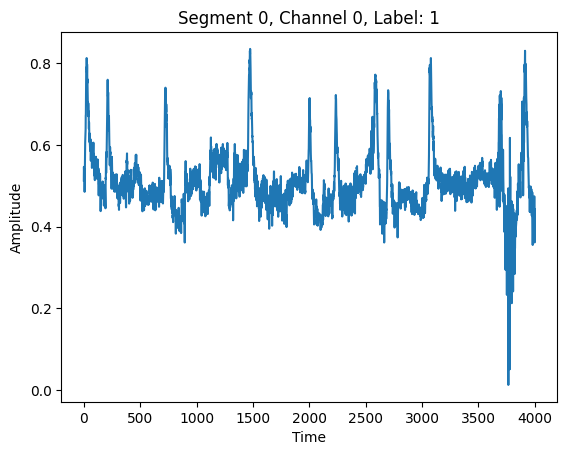

: 

In [21]:
import matplotlib.pyplot as plt

# Visualize the first channel of the first segment
plt.plot(eeg_data[0, 0, :])
plt.title(f"Segment 0, Channel 0, Label: {labels[0]}")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    eeg_data, labels, test_size=0.20, random_state=42, stratify=labels
)

# Further split the training data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42, stratify=y_train
)

# Display shapes
print(f"Training Data Shape: {X_train_final.shape}, Training Labels Shape: {y_train_final.shape}")
print(f"Validation Data Shape: {X_val.shape}, Validation Labels Shape: {y_val.shape}")
print(f"Testing Data Shape: {X_test.shape}, Testing Labels Shape: {y_test.shape}")


Training Data Shape: (4301, 24, 4000), Training Labels Shape: (4301,)
Validation Data Shape: (1076, 24, 4000), Validation Labels Shape: (1076,)
Testing Data Shape: (1345, 24, 4000), Testing Labels Shape: (1345,)


In [23]:

import numpy as np
np.set_printoptions(threshold=1000)  # Default threshold

# Set NumPy to display the full array
np.set_printoptions(threshold=np.inf)

# Print the full `y_test` array
print(f"Testing Labels: {y_test}")



Testing Labels: [3 3 1 2 3 2 3 0 2 2 1 3 3 0 2 1 0 2 1 1 0 1 1 0 2 2 0 0 3 0 3 3 1 0 0 1 1
 0 3 2 0 2 1 3 1 1 1 0 0 3 3 0 1 2 0 3 3 1 1 0 3 0 1 1 1 2 2 0 0 0 2 1 1 0
 0 1 2 2 2 0 2 2 2 0 1 3 0 1 1 0 1 3 2 1 0 0 3 1 1 3 3 3 0 3 3 2 1 3 1 3 3
 1 2 3 0 2 1 0 0 3 3 1 3 2 2 1 2 2 2 2 1 3 3 0 3 3 0 2 1 3 0 1 0 1 1 1 3 1
 0 3 2 1 3 1 3 1 2 2 3 3 1 2 1 0 3 2 0 1 2 0 0 0 3 0 3 3 0 0 1 2 3 1 3 0 1
 2 2 1 0 2 3 2 2 2 2 0 2 3 2 2 3 3 2 1 1 3 1 3 2 1 0 1 2 2 3 3 0 3 3 2 1 3
 3 0 1 0 0 2 2 1 0 2 2 0 1 2 2 1 2 1 0 1 0 2 2 0 2 3 1 0 1 2 1 1 2 3 2 1 1
 3 0 3 1 1 2 3 1 3 3 2 2 0 0 2 3 1 3 2 0 0 2 2 3 2 1 1 2 1 0 0 2 3 2 2 3 2
 0 3 3 1 3 0 3 0 0 1 1 2 1 3 2 1 2 0 0 2 2 1 0 2 2 1 2 1 3 3 1 3 3 0 1 2 1
 0 2 1 3 1 0 2 2 0 2 3 2 3 2 0 0 1 1 3 2 0 2 3 1 1 2 1 1 1 3 0 2 3 2 1 0 3
 3 1 2 0 1 2 3 2 1 1 0 2 3 2 1 0 1 0 2 2 1 3 2 2 2 2 0 1 1 3 3 2 1 3 3 1 2
 2 0 3 0 1 3 0 0 2 1 2 1 3 1 1 1 1 3 0 2 3 3 3 2 3 1 3 2 0 0 1 3 1 0 1 1 3
 2 0 1 3 1 3 2 3 2 1 1 0 2 1 3 2 1 0 0 1 0 0 3 3 1 1 0 0 3 1 1 3 1 3 2 1 0
 3 3 2 3 

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Reshape data for CNN input (add channel dimension)
X_train_cnn = X_train_final[..., np.newaxis]
X_val_cnn = X_val[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24, 4000, 1), kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Dropout for regularization
    Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Dropout for regularization
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Dropout for regularization
    Dense(4, activation='softmax')  # 4 output classes
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 22, 3998, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 1999, 32)     0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 11, 1999, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 1997, 64)       18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 998, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 4, 998, 64)       

In [27]:
import hashlib

def hash_row(row):
    return hashlib.md5(row.tobytes()).hexdigest()

# Hash training and testing data
train_hashes = {hash_row(row) for row in X_train.reshape(X_train.shape[0], -1)}
test_hashes = {hash_row(row) for row in X_test.reshape(X_test.shape[0], -1)}

# Check for overlap
overlap = train_hashes.intersection(test_hashes)
if overlap:
    print(f"Warning: Detected {len(overlap)} overlapping samples between train and test sets.")
else:
    print("No overlap detected between train and test sets.")


KeyboardInterrupt: 

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_cnn, y_train_final,
    validation_data=(X_val_cnn, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)


# Save the trained model
model.save("eeg_cnn_model.h544")



Epoch 1/20
135/135 [==============================] - 118s 866ms/step - loss: 0.6886 - accuracy: 0.8589 - val_loss: 0.5900 - val_accuracy: 0.9387
Epoch 2/20
135/135 [==============================] - 136s 1s/step - loss: 0.6425 - accuracy: 0.8870 - val_loss: 0.5312 - val_accuracy: 0.9359
Epoch 3/20
135/135 [==============================] - 131s 970ms/step - loss: 0.6413 - accuracy: 0.8921 - val_loss: 0.5338 - val_accuracy: 0.9684
Epoch 4/20
135/135 [==============================] - 146s 1s/step - loss: 0.5904 - accuracy: 0.9051 - val_loss: 0.4502 - val_accuracy: 0.9796
Epoch 5/20
135/135 [==============================] - 279s 2s/step - loss: 0.5637 - accuracy: 0.9175 - val_loss: 0.4426 - val_accuracy: 0.9833
Epoch 6/20
135/135 [==============================] - 255s 2s/step - loss: 0.5493 - accuracy: 0.9184 - val_loss: 0.4601 - val_accuracy: 0.9777
Epoch 7/20
135/135 [==============================] - 260s 2s/step - loss: 0.5441 - accuracy: 0.9175 - val_loss: 0.4500 - val_accuracy: 

INFO:tensorflow:Assets written to: eeg_cnn_model.h544\assets


INFO:tensorflow:Assets written to: eeg_cnn_model.h544\assets


In [31]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_cnn, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")


43/43 - 8s - loss: 0.3919 - accuracy: 0.9814 - 8s/epoch - 192ms/step
Test Accuracy: 0.98


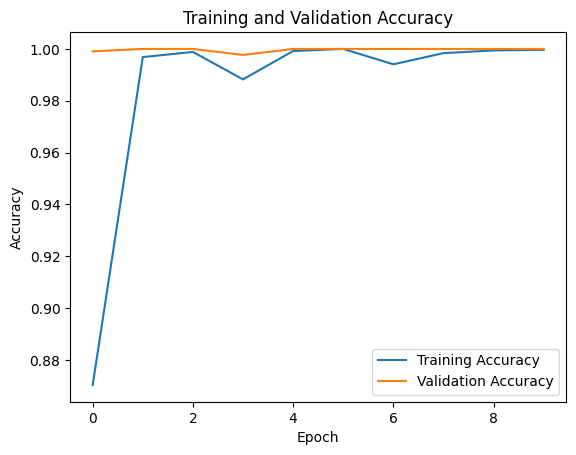

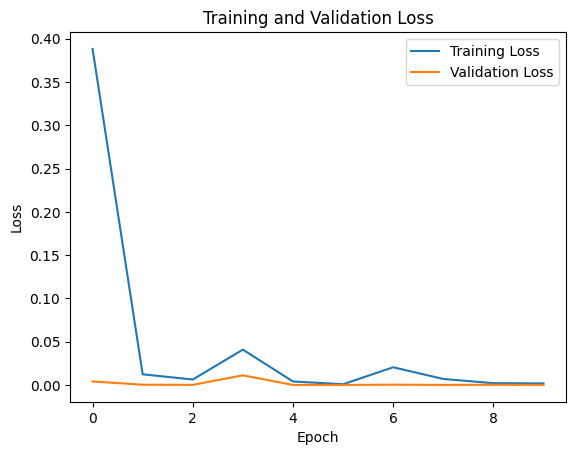

In [11]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [12]:
from sklearn.dummy import DummyClassifier
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)


# Baseline Model
baseline_model = DummyClassifier(strategy="uniform")  # Random guesses
baseline_model.fit(X_train_flattened, y_train)

# Predict and evaluate
baseline_accuracy = baseline_model.score(X_test_flattened, y_test)
print(f"Baseline Model Test Accuracy (Random Guess): {baseline_accuracy:.2f}")

Baseline Model Test Accuracy (Random Guess): 0.25


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_flattened, y_train, test_size=0.2, random_state=42
)

# Train the SVM on the final training data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_final, y_train_final)

# Evaluate on validation data
y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"SVM Validation Accuracy: {val_accuracy:.2f}")

# Predict on the unseen test set
y_test_pred = svm_model.predict(X_test_flattened)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"SVM Test Accuracy (Unseen Data): {test_accuracy:.2f}")


SVM Validation Accuracy: 1.00
SVM Test Accuracy (Unseen Data): 1.00
